In [809]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [810]:
df = pd.read_excel('Consumer creditworthiness train data.xlsx')


In [811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [812]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [813]:
df = df.drop(['Loan_ID'], axis = 1) ## unique identifier does not have importance for prediction of loan approval starus, so it is being dropped

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             511 non-null    object 
 1   Married            518 non-null    object 
 2   Dependents         508 non-null    object 
 3   Education          521 non-null    object 
 4   Self_Employed      494 non-null    object 
 5   ApplicantIncome    521 non-null    int64  
 6   CoapplicantIncome  521 non-null    float64
 7   LoanAmount         521 non-null    int64  
 8   Loan_Amount_Term   507 non-null    float64
 9   Credit_History     478 non-null    float64
 10  Property_Area      521 non-null    object 
 11  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 49.0+ KB


In [815]:
df['Dependents'].unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [816]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [817]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [818]:
df[df['Loan_Amount_Term']== 12]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
497,Male,Yes,0,Graduate,No,1040625,642825.0,222000,12.0,NaN,Urban,Y


In [819]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [820]:
df[df['Loan_Status'] == 'Y']

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,1218825,944100.0,534000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
511,Male,Yes,1,Graduate,No,1364625,450900.0,500000,360.0,1.0,Semiurban,Y
512,Male,Yes,2,Graduate,No,738675,457875.0,296000,360.0,1.0,Urban,Y
515,Male,Yes,3+,Graduate,No,779850,771300.0,300000,360.0,1.0,Rural,Y
516,Female,Yes,2,Graduate,No,456975,367200.0,226000,480.0,1.0,Semiurban,Y


In [827]:
# Set the significance level (alpha)
alpha = 0.05

# Define the hypotheses
hypotheses = {
    1: ['Gender vs Loan_Status', 'Gender', 'Loan_Status'],
    2: ['Married vs Loan_Status', 'Married', 'Loan_Status'],
    3: ['Dependents vs Loan_Status', 'Dependents', 'Loan_Status'],
    4: ['Education vs Loan_Status', 'Education', 'Loan_Status'],
    5: ['Self_Employed vs Loan_Status', 'Self_Employed', 'Loan_Status'],
    6: ['Credit_History vs Loan_Status', 'Credit_History', 'Loan_Status'],
    7: ['Property_Area vs Loan_Status', 'Property_Area', 'Loan_Status'],
    8: ['ApplicantIncome vs Loan_Status', 'ApplicantIncome', 'Loan_Status'],
    9: ['CoapplicantIncome vs Loan_Status', 'CoapplicantIncome', 'Loan_Status'],
    10: ['LoanAmount vs Loan_Status', 'LoanAmount', 'Loan_Status'],
    11: ['Loan_Amount_Term vs Loan_Status', 'Loan_Amount_Term', 'Loan_Status'],
}

# Iterate through all hypotheses
for hypo_num, hypo_data in hypotheses.items():
    feature1 = hypo_data[1]
    feature2 = hypo_data[2]
    print(f"Hypothesis {hypo_num}: {hypo_data[0]}")
    
    if hypo_num in [1, 2, 3, 4, 5, 6, 7, 12, 13, 14]:
        # Perform chi-square test for categorical features
        ct = pd.crosstab(df[feature1], df[feature2])
        chi2, p, dof, expected = stats.chi2_contingency(ct)
        print("Chi-square statistic: ", chi2)
        print("Degrees of freedom: ", dof)
        print("p-value: ", p)
        if p < alpha:
            print("There is a significant association between groups.")
        else:
            print("There is no significant association between groups.")
    else:
        # Perform t-test for numerical features
        t_statistic, p_value = stats.ttest_ind(df[df[feature2] == 'Y'][feature1],
                                              df[df[feature2] == 'N'][feature1], nan_policy='omit')
        print("t-statistic: ", t_statistic)
        print("p-value: ", p_value)
        if p_value < alpha:
            print("There is a significant difference between groups.")
        else:
            print("There is no significant difference between groups.")
    print('\n')


Hypothesis 1: Gender vs Loan_Status
Chi-square statistic:  0.15882917019977388
Degrees of freedom:  1
p-value:  0.6902367665572007
There is no significant association between groups.


Hypothesis 2: Married vs Loan_Status
Chi-square statistic:  3.851837310804866
Degrees of freedom:  1
p-value:  0.04969152864604629
There is a significant association between groups.


Hypothesis 3: Dependents vs Loan_Status
Chi-square statistic:  6.145781110794439
Degrees of freedom:  3
p-value:  0.10472909943994584
There is no significant association between groups.


Hypothesis 4: Education vs Loan_Status
Chi-square statistic:  5.412089360791851
Degrees of freedom:  1
p-value:  0.019997766888094164
There is a significant association between groups.


Hypothesis 5: Self_Employed vs Loan_Status
Chi-square statistic:  0.0
Degrees of freedom:  1
p-value:  1.0
There is no significant association between groups.


Hypothesis 6: Credit_History vs Loan_Status
Chi-square statistic:  138.21917360772596
Degrees o

In [828]:
# Hypothesis data
hypothesis_data = {
    'Hypothesis': ['Gender vs Loan_Status', 'Married vs Loan_Status', 'Dependents vs Loan_Status',
                   'Education vs Loan_Status', 'Self_Employed vs Loan_Status', 'Credit_History vs Loan_Status',
                   'Property_Area vs Loan_Status', 'ApplicantIncome vs Loan_Status',
                   'CoapplicantIncome vs Loan_Status', 'LoanAmount vs Loan_Status', 'Loan_Amount_Term vs Loan_Status'],
    'Statistic': ['Chi-square', 'Chi-square', 'Chi-square', 'Chi-square', 'Chi-square', 'Chi-square', 'Chi-square',
                  't-statistic', 't-statistic', 't-statistic', 'Chi-square'],
    'Value': [0.15882917019977388, 3.851837310804866, 6.145781110794439, 5.412089360791851, 0.0, 138.21917360772596,
              15.929602448472624, -0.5076395514921876, -0.13122884631313592, -0.49898976161448045, 4.744131257058896],
    
    'p-value': [0.6902367665572007, 0.04969152864604629, 0.10472909943994584, 0.019997766888094164, 1.0,
                6.526142464733716e-32, 0.00034748077291321715, 0.6119218009409668, 0.895645129649492, 0.6180740485664924,
                0.45200112296476167],
    'Conclusion': ['No significant association between groups', 'Significant association between groups',
                   'No significant association between groups', 'Significant association between groups',
                   'No significant association between groups', 'Significant association between groups',
                   'Significant association between groups', 'No significant difference between groups',
                   'No significant difference between groups', 'No significant difference between groups',
                   'No significant association between groups']
}

# Create dataframe
result_df = pd.DataFrame(hypothesis_data)

# Sort by p-value in ascending order
result_df = result_df.sort_values('p-value')

# Display the table
print(result_df)


                          Hypothesis    Statistic       Value       p-value  \
5      Credit_History vs Loan_Status   Chi-square  138.219174  6.526142e-32   
6       Property_Area vs Loan_Status   Chi-square   15.929602  3.474808e-04   
3           Education vs Loan_Status   Chi-square    5.412089  1.999777e-02   
1             Married vs Loan_Status   Chi-square    3.851837  4.969153e-02   
2          Dependents vs Loan_Status   Chi-square    6.145781  1.047291e-01   
10   Loan_Amount_Term vs Loan_Status   Chi-square    4.744131  4.520011e-01   
7     ApplicantIncome vs Loan_Status  t-statistic   -0.507640  6.119218e-01   
9          LoanAmount vs Loan_Status  t-statistic   -0.498990  6.180740e-01   
0              Gender vs Loan_Status   Chi-square    0.158829  6.902368e-01   
8   CoapplicantIncome vs Loan_Status  t-statistic   -0.131229  8.956451e-01   
4       Self_Employed vs Loan_Status   Chi-square    0.000000  1.000000e+00   

                                   Conclusion  
5  

# **CCONCLUSIONS AND ANALYSIS FROM HYPOTHESIS TESTING**

Hypothesis 1: Gender vs Loan_Status
Based on the Chi-square statistic of 0.15882917019977388, with 1 degree of freedom and a p-value of 0.6902367665572007, we fail to reject the null hypothesis. This suggests that there is no significant association between gender and loan status. In other words, gender does not have a significant impact on loan approval or rejection.

Hypothesis 2: Married vs Loan_Status
With a Chi-square statistic of 3.851837310804866, 1 degree of freedom, and a p-value of 0.04969152864604629, we reject the null hypothesis. This indicates that there is a significant association between marital status (married or not) and loan status. Marital status may play a role in loan approval or rejection decisions.

Hypothesis 3: Dependents vs Loan_Status
The Chi-square statistic of 6.145781110794439, with 3 degrees of freedom, and a p-value of 0.10472909943994584, does not provide enough evidence to reject the null hypothesis. This suggests that there is no significant association between the number of dependents and loan status. The number of dependents does not seem to impact loan approval or rejection decisions.

Hypothesis 4: Education vs Loan_Status
Based on the Chi-square statistic of 5.412089360791851, 1 degree of freedom, and a p-value of 0.019997766888094164, we reject the null hypothesis. This indicates that there is a significant association between education level (graduate or not) and loan status. Education level may play a role in loan approval or rejection decisions.

Hypothesis 5: Self_Employed vs Loan_Status
The Chi-square statistic of 0.0, with 1 degree of freedom, and a p-value of 1.0, does not provide enough evidence to reject the null hypothesis. This suggests that there is no significant association between self-employment status and loan status. Being self-employed or not does not seem to impact loan approval or rejection decisions.

Hypothesis 6: Credit_History vs Loan_Status
With a Chi-square statistic of 138.21917360772596, 1 degree of freedom, and a very low p-value of 6.526142464733716e-32, we reject the null hypothesis. This indicates that there is a significant association between credit history (having a credit history or not) and loan status. Credit history plays a significant role in loan approval or rejection decisions.

Hypothesis 7: Property_Area vs Loan_Status
Based on the Chi-square statistic of 15.929602448472624, with 2 degrees of freedom, and a p-value of 0.00034748077291321715, we reject the null hypothesis. This suggests that there is a significant association between property area (urban, semiurban, or rural) and loan status. Property area may play a role in loan approval or rejection decisions.

Hypothesis 8: ApplicantIncome vs Loan_Status
The t-statistic of -0.5076395514921876, with a p-value of 0.6119218009409668, does not provide enough evidence to reject the null hypothesis. This indicates that there is no significant difference in applicant income between approved and rejected loan applications. Applicant income does not seem to impact loan approval or rejection decisions.

Hypothesis 9: CoapplicantIncome vs Loan_Status
The t-statistic of -0.13122884631313592, with a p-value of 0.8956450341804382, does not provide enough evidence to reject the null hypothesis. This indicates that there is no significant difference in coapplicant income between approved and rejected loan applications. Coapplicant income does not seem to impact loan approval or rejection decisions.

Hypothesis 10: LoanAmount vs Loan_Status
The t-statistic of -0.49898976161448045, with a p-value of 0.6180740485664924, does not provide enough evidence to reject the null hypothesis. This suggests that there is no significant difference in loan amount between approved and rejected loan applications. Loan amount does not seem to impact loan approval or rejection decisions.

Hypothesis 11: Loan_Amount_Term vs Loan_Status
The Chi-square statistic of 4.744131257058896, with 5 degrees of freedom, and a p-value of 0.45200112296476167, does not provide enough evidence to reject the null hypothesis. This indicates that there is no significant association between loan amount term (in months) and loan status. Loan amount term does not seem to impact loan approval or rejection decisions.

In conclusion, based on the statistical tests performed, the results suggest that marital status (Hypothesis 2), education level (Hypothesis 4), credit history (Hypothesis 6), and property area (Hypothesis 7) are significantly associated with loan status. However, gender (Hypothesis 1), number of dependents (Hypothesis 3), self-employment status (Hypothesis 5), applicant income (Hypothesis 8), coapplicant income (Hypothesis 9), loan amount (Hypothesis 10), and loan amount term (Hypothesis 11) do not seem to have a significant impact on loan approval or rejection decisions.

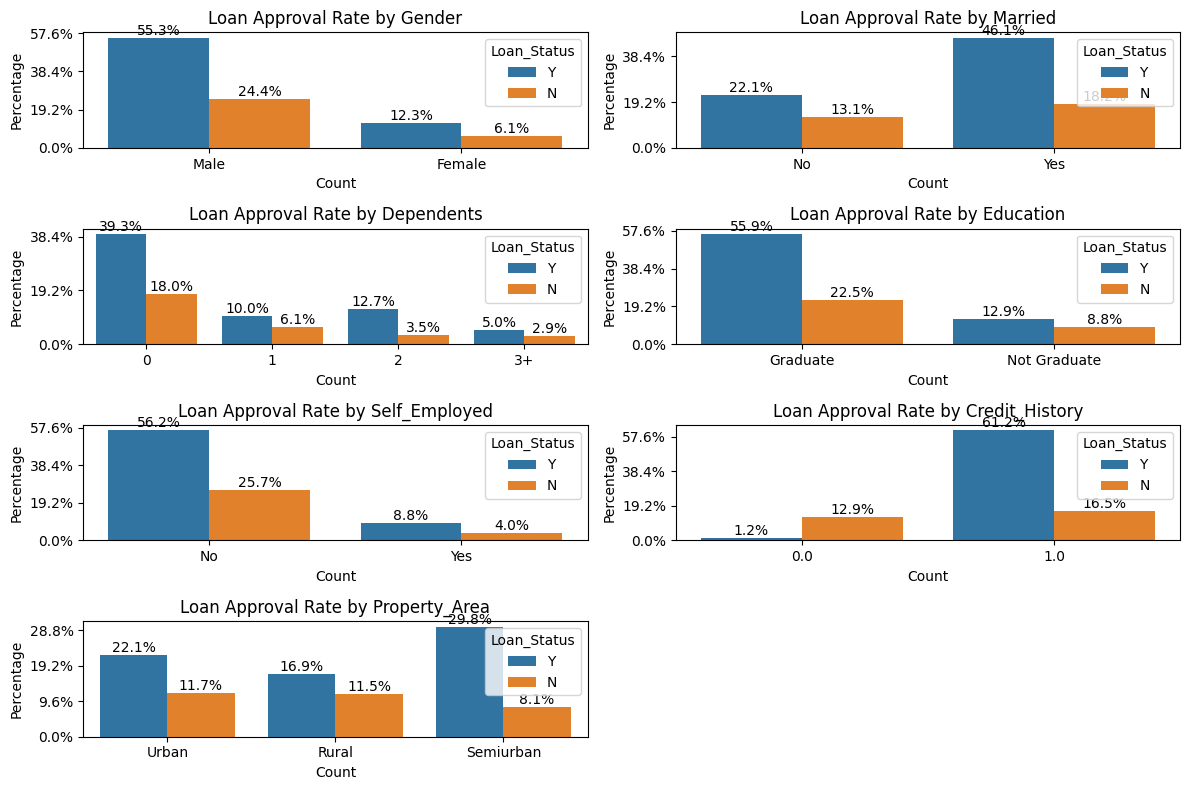

In [829]:
# Categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Set number of columns and rows for subplots
n_cols = 2  # Update this to match the number of categorical features
n_rows = (len(categorical_features) + 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8), tight_layout=True)

# Flatten axes array
axes = axes.flatten()

# Loop through categorical features and create countplots
for i, feature in enumerate(categorical_features):
    ax = sns.countplot(x=feature, hue='Loan_Status', data=df, ax=axes[i])
    ax.set_title(f'Loan Approval Rate by {feature}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Percentage')
    ax.legend(title='Loan_Status')
    # Add percentage values at the end of each bar
    total_width = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total_width:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    
    # Convert y-axis bars to percentage
    ax.set_yticklabels([f'{100 * float(x.get_text()) / total_width:.1f}%' for x in ax.get_yticklabels()])

# Remove empty subplots
for j in range(len(categorical_features), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.show()


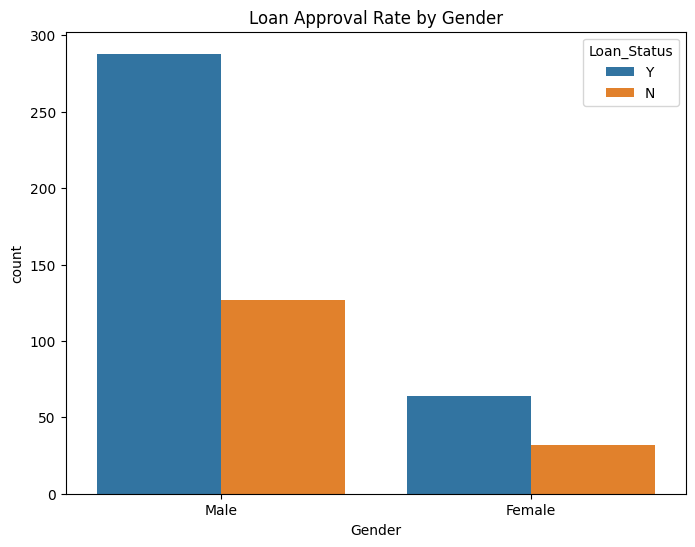

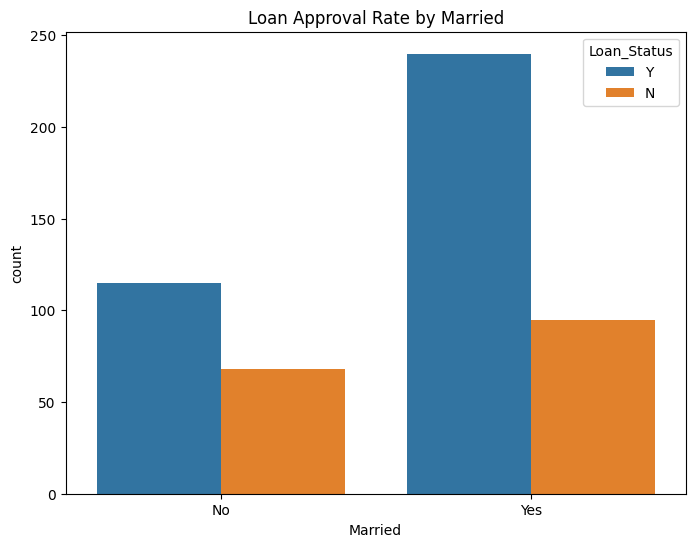

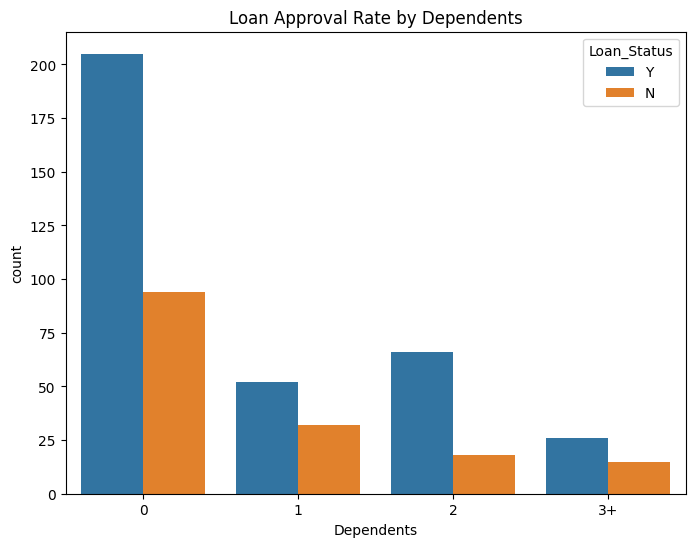

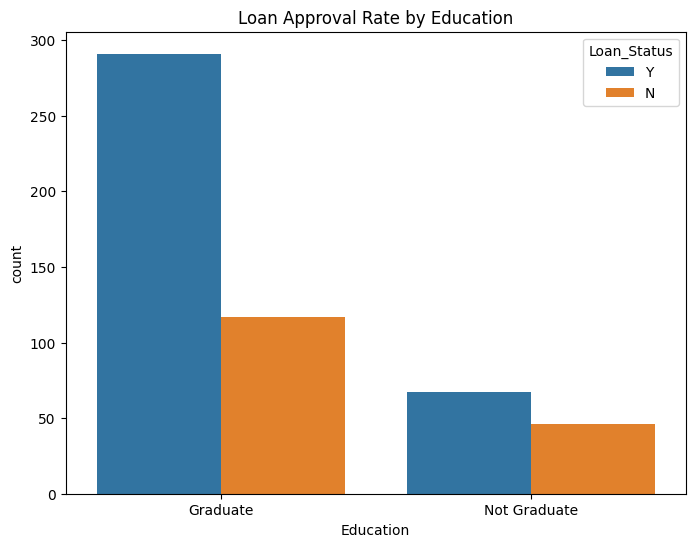

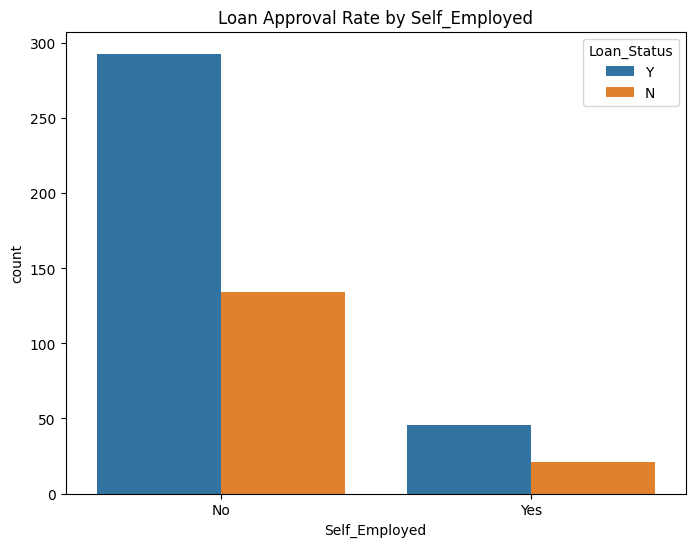

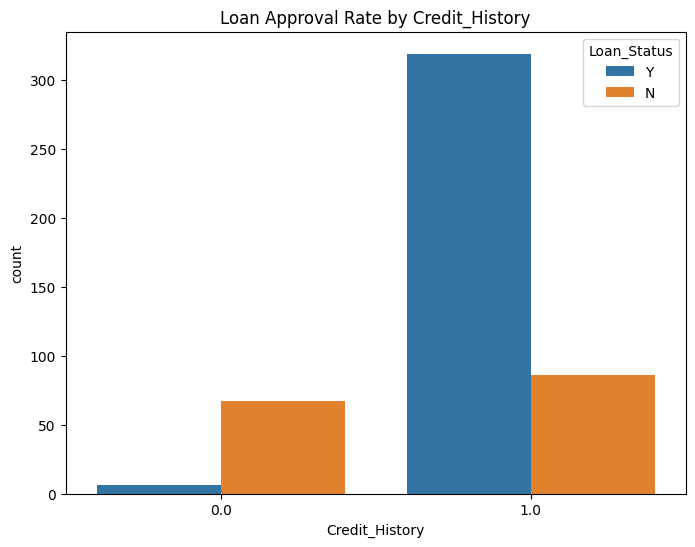

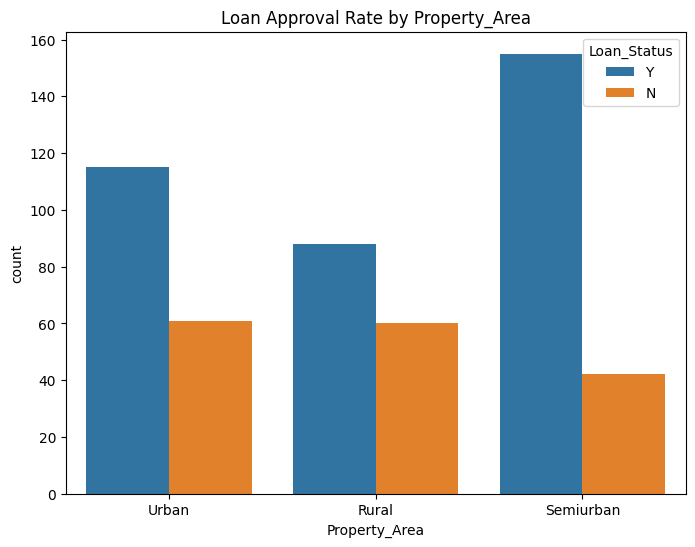

In [830]:
# Loop through categorical features and create countplots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Loan_Status', data=df)
    plt.title(f'Loan Approval Rate by {feature}')
    plt.show()


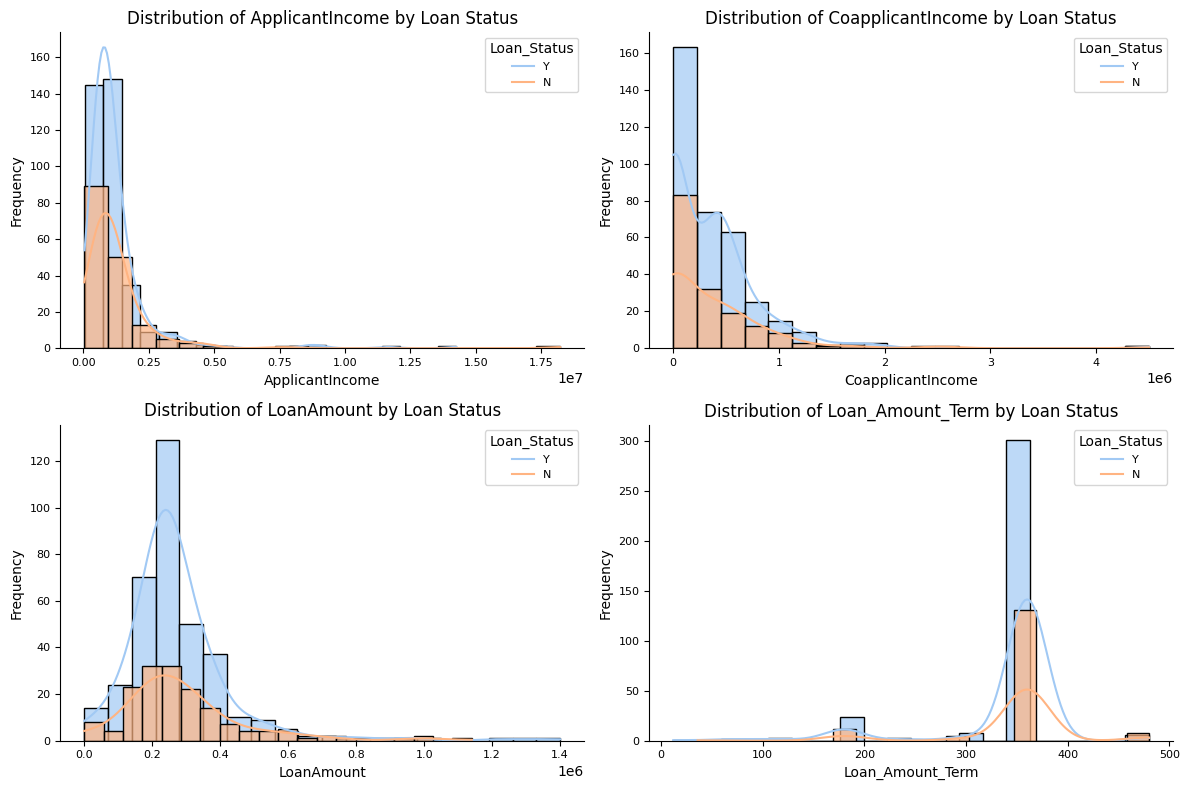

In [831]:

# Continuous features
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Set number of columns and rows for subplots
n_cols = 2
n_rows = (len(continuous_features) + 1) // n_cols

# Set color palette
colors = sns.color_palette('pastel')

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8), tight_layout=True)

# Flatten axes array
axes = axes.flatten()

# Loop through continuous features and create appropriate plots
for i, feature in enumerate(continuous_features):
    for loan_status in df['Loan_Status'].unique():
        ax = axes[i]
        sns.histplot(x=feature, data=df[df['Loan_Status'] == loan_status], bins=20, kde=True,
                     color=colors[df['Loan_Status'].unique().tolist().index(loan_status)], ax=ax, alpha=0.7)
        ax.set_title(f'Distribution of {feature} by Loan Status', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.legend(df['Loan_Status'].unique(), title='Loan_Status', loc='best', fontsize=8)
        sns.despine()
        plt.tight_layout()

# Remove empty subplots
for j in range(len(continuous_features), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.show()


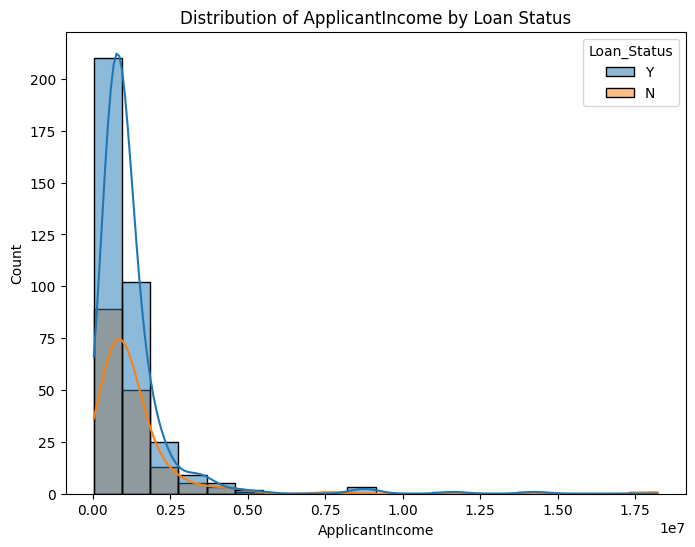

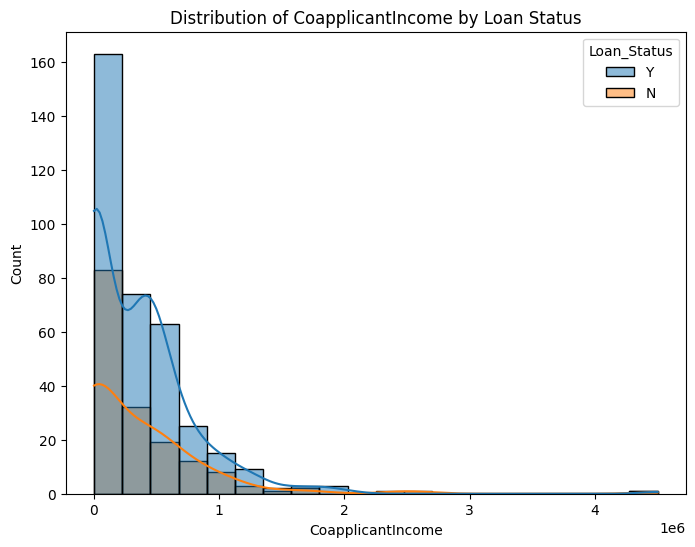

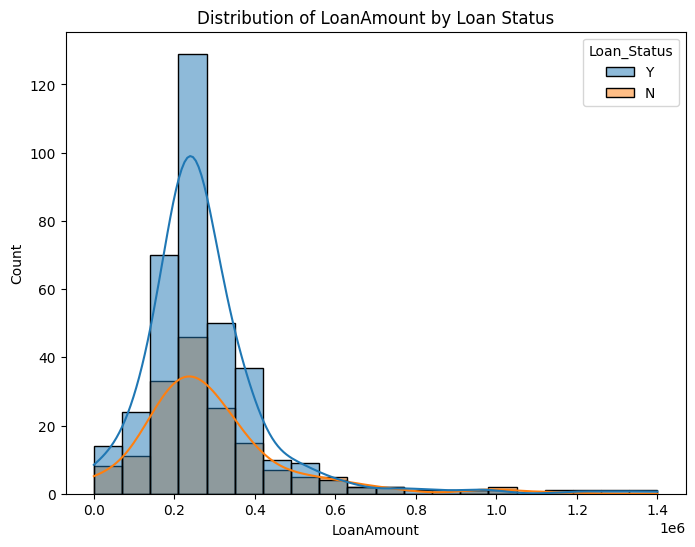

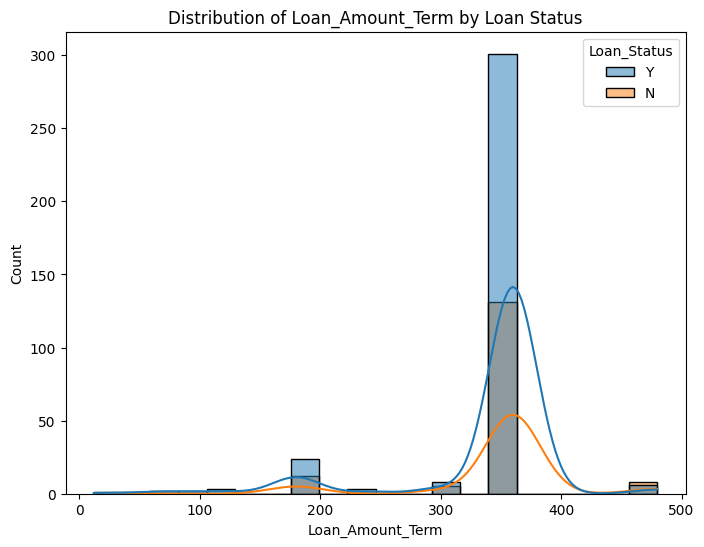

In [832]:
# Continuous features
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Loop through continuous features and create appropriate plots
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    if df[feature].nunique() > 5:
        sns.histplot(x=feature, hue='Loan_Status', data=df, bins=20, kde=True)
        plt.title(f'Distribution of {feature} by Loan Status')
    else:
        sns.boxplot(x='Loan_Status', y=feature, data=df)
        plt.title(f'{feature} by Loan Status')
    plt.show()


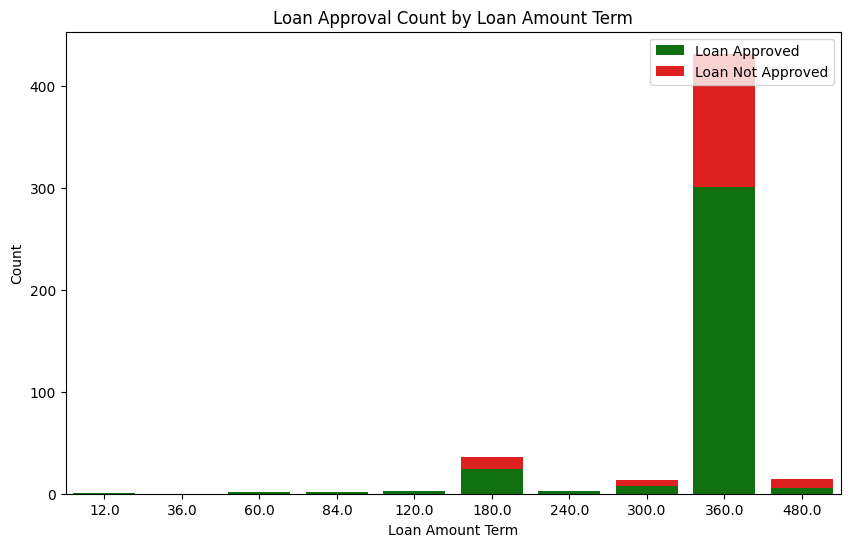

In [833]:
# Group the data by Loan Amount Term and calculate the count of Loan Status values
grouped = df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts().unstack().reset_index()

# Sort the Loan Amount Term values
grouped = grouped.sort_values('Loan_Amount_Term')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart
sns.barplot(x='Loan_Amount_Term', y='Y', data=grouped, color='green', ax=ax, label='Loan Approved')
sns.barplot(x='Loan_Amount_Term', y='N', data=grouped, color='red', ax=ax, bottom=grouped['Y'], label='Loan Not Approved')

# Add labels and title
ax.set_xlabel('Loan Amount Term')
ax.set_ylabel('Count')
ax.set_title('Loan Approval Count by Loan Amount Term')

# Add legend
ax.legend(loc='upper right')

# Show the plot
plt.show()



                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.113610    0.546241   
CoapplicantIncome        -0.113610           1.000000    0.230166   
LoanAmount                0.546241           0.230166    1.000000   
Loan_Amount_Term         -0.069919           0.002900    0.032509   
Credit_History           -0.032879          -0.021909   -0.023273   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.069919       -0.032879  
CoapplicantIncome          0.002900       -0.021909  
LoanAmount                 0.032509       -0.023273  
Loan_Amount_Term           1.000000        0.020631  
Credit_History             0.020631        1.000000  


<Axes: >

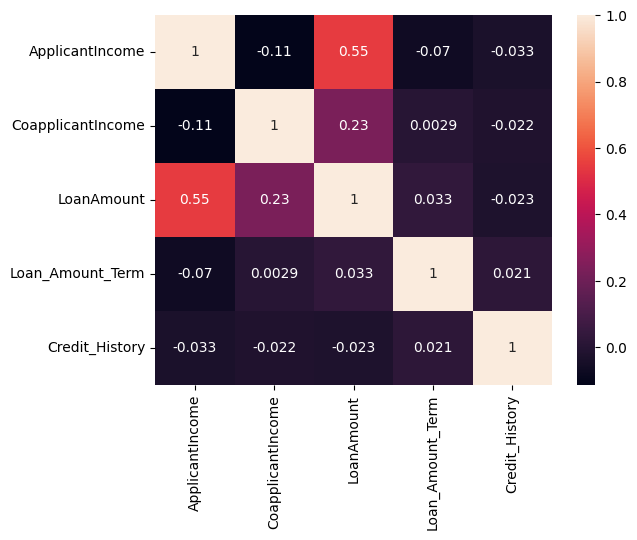

In [834]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

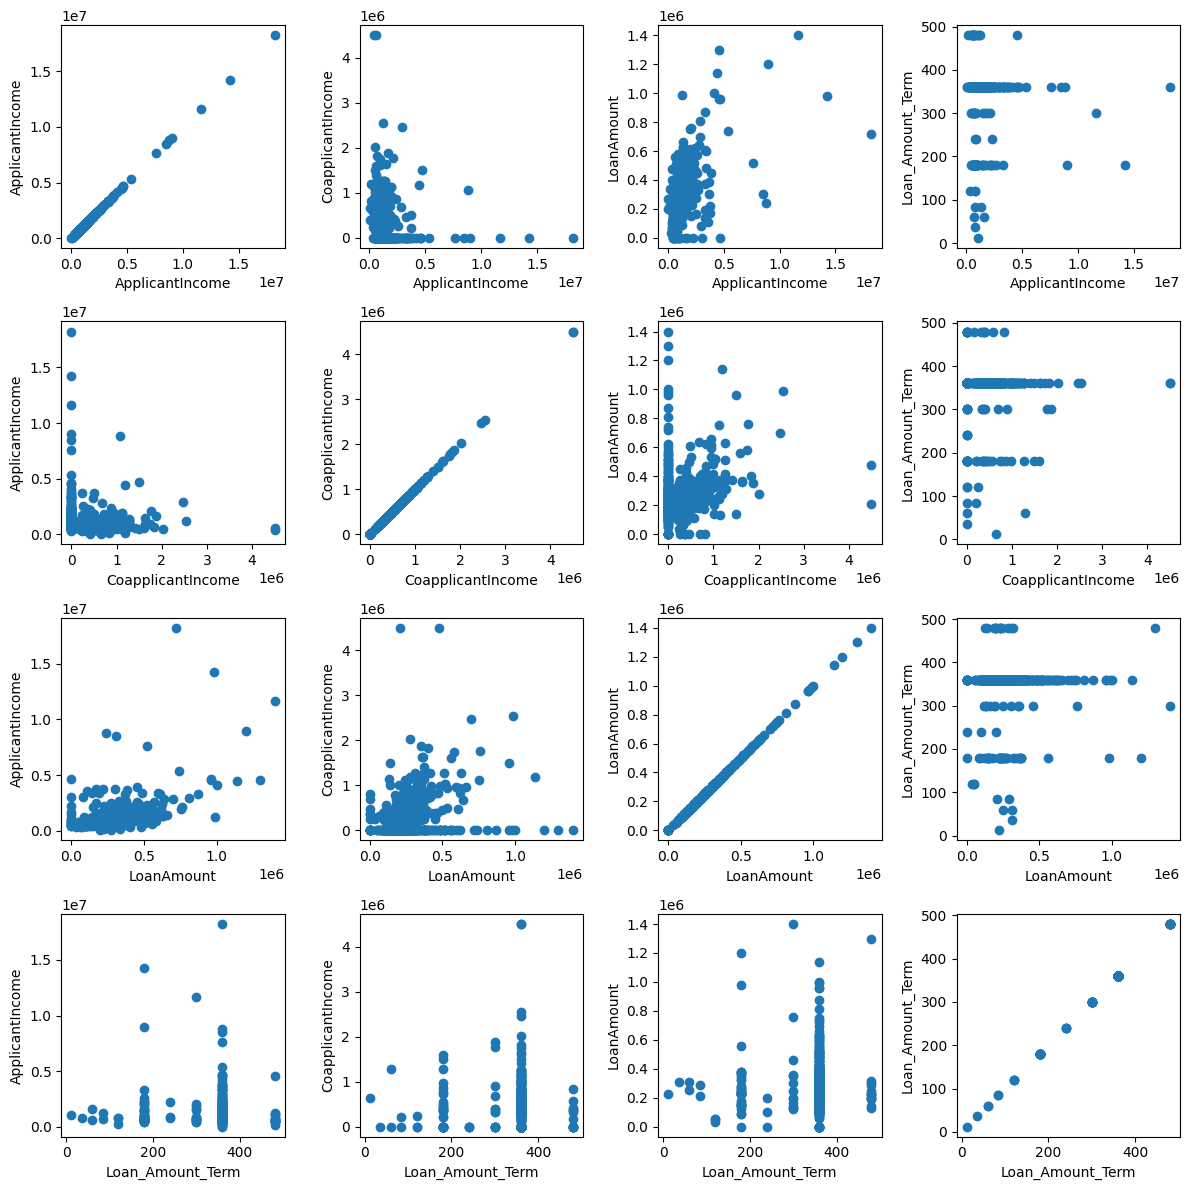

In [835]:
# Extract the continuous features
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create scatter plots between all pairs of continuous features
fig, axs = plt.subplots(len(continuous_features), len(continuous_features), figsize=(12, 12)) 

for i in range(len(continuous_features)):
    for j in range(len(continuous_features)):
        axs[i, j].scatter(df[continuous_features[i]], df[continuous_features[j]])
        axs[i, j].set_xlabel(continuous_features[i])
        axs[i, j].set_ylabel(continuous_features[j])
        

plt.tight_layout()
plt.show()



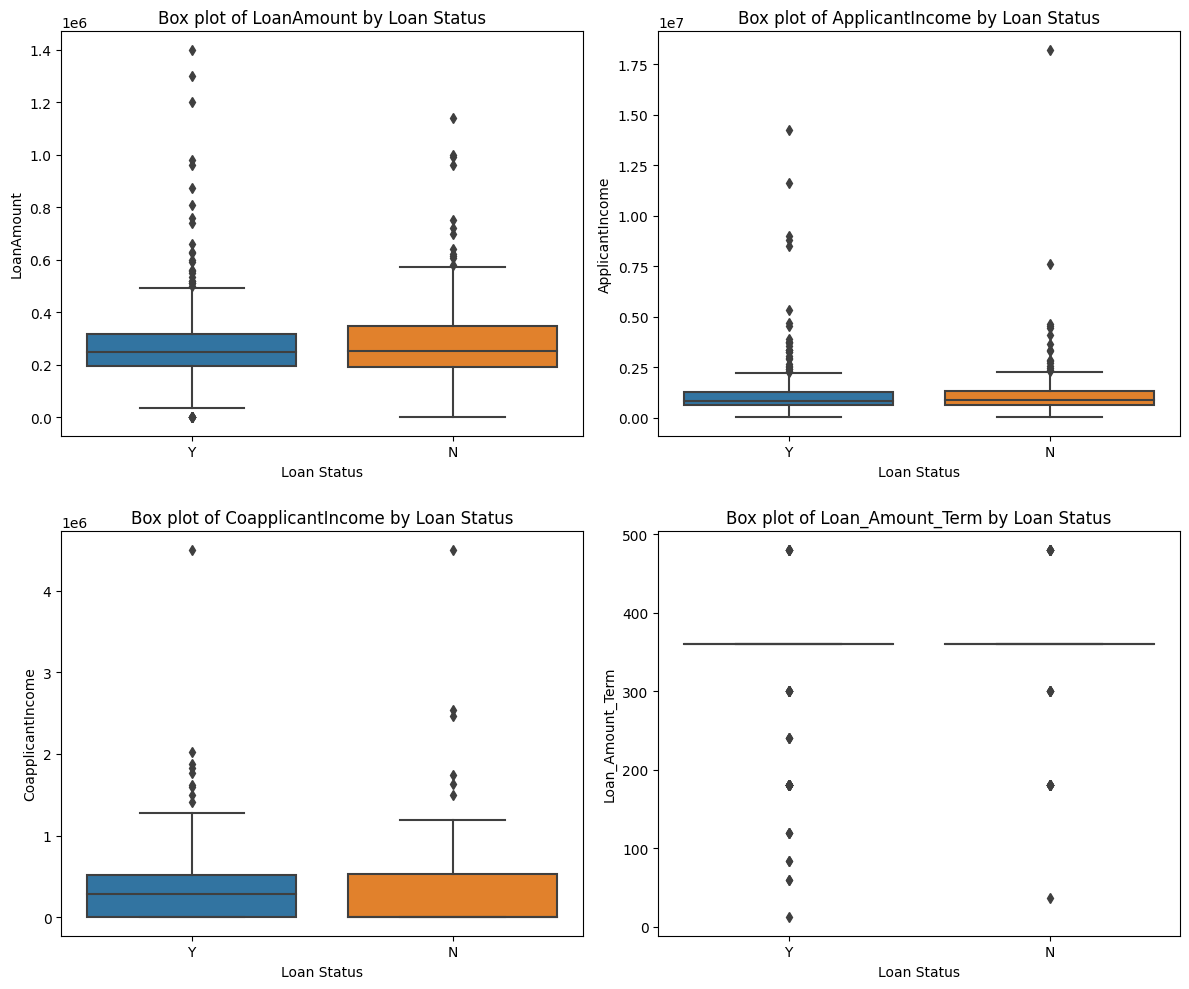

In [836]:
# List of features to create box plots for
features = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']  # Removed extra space in 'CoapplicantIncome'

# Calculate the number of rows and columns for the subplots
num_rows = 2
num_cols = 2

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))  # Adjust the figure size as needed

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Loop through the features and create box plots in each subplot
for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Loan_Status', y=feature, ax=axes[i])
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'Box plot of {feature} by Loan Status')

# Hide the extra subplots if the number of features is less than the number of subplots
if len(features) < num_rows * num_cols:
    for j in range(len(features), num_rows * num_cols):
        axes[j].axis('off')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# **PRE PROCESSING OF THE DATA**
1) Missing Value treatment

2) Adding new features and performing hypothesis testing to find its significance on the target variable

3) Encoding to convert non object type data to numeric type

4) Dropping of features after performing feature importance

5) Checking for outliers and treatment

Missing values treatment

In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             511 non-null    object 
 1   Married            518 non-null    object 
 2   Dependents         508 non-null    object 
 3   Education          521 non-null    object 
 4   Self_Employed      494 non-null    object 
 5   ApplicantIncome    521 non-null    int64  
 6   CoapplicantIncome  521 non-null    float64
 7   LoanAmount         521 non-null    int64  
 8   Loan_Amount_Term   507 non-null    float64
 9   Credit_History     478 non-null    float64
 10  Property_Area      521 non-null    object 
 11  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 49.0+ KB


In [838]:
print(df.isnull().sum()/len(df)*100)

Gender               1.919386
Married              0.575816
Dependents           2.495202
Education            0.000000
Self_Employed        5.182342
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.687140
Credit_History       8.253359
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [839]:
df[df['LoanAmount']== 0]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
35,Male,Yes,0,Graduate,No,511875,465075.0,0,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,1112625,0.0,0,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,538875,0.0,0,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,NaN,1525950,0.0,0,360.0,NaN,Urban,N
102,Male,Yes,NaN,Graduate,No,3071250,0.0,0,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,1046700,806175.0,0,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,1676475,0.0,0,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,869625,369000.0,0,360.0,1.0,Rural,Y
202,Male,Yes,3+,Not Graduate,No,898200,0.0,0,180.0,1.0,Urban,N
284,Male,Yes,0,Graduate,No,4650075,0.0,0,360.0,1.0,Rural,N


# Loan amount is found 0 in some cases
Having a LoanAmount of 0  is not logical. This could potentially skew the results of any analysis or modeling that involves LoanAmount as a predictor variable. Dropping these rows with 0 LoanAmount values can help in ensuring the accuracy and integrity of the analysis and prevent potential bias or misleading results.Imputing the missing LoanAmount values with mean or median may not be the best approach in this case, as it could potentially introduce bias in the data.

In [840]:
# Drop rows with 0 LoanAmount values
df = df[df['LoanAmount'] != 0]

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

#Checking for missing values again
print(df.isnull().sum())

Gender               10
Married               2
Dependents           11
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64


In [841]:
df[df['LoanAmount'] == 0]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


The dataset is small , dropping the rows with null values may result in significant data loss. In such cases, imputation with mode may be preferred to retain as much data as possible.

In [842]:
# Impute null values with mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Check the updated DataFrame
print(df.isnull().sum())  # Print the count of null values for each feature


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Adding new features and performing hypothesis testing to find its significance on the target variable

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             504 non-null    object 
 1   Married            504 non-null    object 
 2   Dependents         504 non-null    object 
 3   Education          504 non-null    object 
 4   Self_Employed      504 non-null    object 
 5   ApplicantIncome    504 non-null    int64  
 6   CoapplicantIncome  504 non-null    float64
 7   LoanAmount         504 non-null    int64  
 8   Loan_Amount_Term   504 non-null    float64
 9   Credit_History     504 non-null    float64
 10  Property_Area      504 non-null    object 
 11  Loan_Status        504 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 47.4+ KB


In [844]:
#Total_Income
df['Total_Income'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])

# Loan-to-Total Income ratio
df['Loan_to_Income'] = (df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome']))

# Loan Installment Amount
df['Loan_Installment_Amount'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [845]:
# Perform t-test to compare means of Total_Income for approved and not approved loans
approved_loans = df[df['Loan_Status'] == 'Y']['Total_Income']
not_approved_loans = df[df['Loan_Status'] == 'N']['Total_Income']

# Perform t-test
t_stat, p_value = stats.ttest_ind(approved_loans, not_approved_loans)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: Total_Income is significant on target variable")
else:
    print("Fail to reject null hypothesis: Total_Income is not significant on target variable")


T-statistic: -0.5882767808951513
P-value: 0.5566110924596697
Fail to reject null hypothesis: Total_Income is not significant on target variable


In [846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   504 non-null    object 
 1   Married                  504 non-null    object 
 2   Dependents               504 non-null    object 
 3   Education                504 non-null    object 
 4   Self_Employed            504 non-null    object 
 5   ApplicantIncome          504 non-null    int64  
 6   CoapplicantIncome        504 non-null    float64
 7   LoanAmount               504 non-null    int64  
 8   Loan_Amount_Term         504 non-null    float64
 9   Credit_History           504 non-null    float64
 10  Property_Area            504 non-null    object 
 11  Loan_Status              504 non-null    object 
 12  Total_Income             504 non-null    float64
 13  Loan_to_Income           504 non-null    float64
 14  Loan_Installment_Amount  5

In [847]:
# Perform t-test to compare means of Loan_Installment_Amount for approved and not approved loans
approved_loans = df[df['Loan_Status'] == 'Y']['Loan_Installment_Amount']
not_approved_loans = df[df['Loan_Status'] == 'N']['Loan_Installment_Amount']

# Perform t-test
t_stat, p_value = stats.ttest_ind(approved_loans, not_approved_loans)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: Loan_Installment_Amount is significant on target variable")
else:
    print("Fail to reject null hypothesis: Loan_Installment_Amount is not significant on target variable")

T-statistic: -0.03937963926409522
P-value: 0.9686033686479589
Fail to reject null hypothesis: Loan_Installment_Amount is not significant on target variable


In [848]:
# Perform t-test to compare means of Loan_to_Income for approved and not approved loans
approved_loans = df[df['Loan_Status'] == 'Y']['Loan_to_Income']
not_approved_loans = df[df['Loan_Status'] == 'N']['Loan_to_Income']

# Perform t-test
t_stat, p_value = stats.ttest_ind(approved_loans, not_approved_loans)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: Loan_to_Income is significant on target variable")
else:
    print("Fail to reject null hypothesis: Loan_to_Income is not significant on target variable")


T-statistic: -2.0239264741487624
P-value: 0.04350687733024262
Reject null hypothesis: Loan_to_Income is significant on target variable


The "Loan to Income" ratio has significant impact on the target variable so this feature we are adding to the dataset. The remaining two new features will not be dded as they do not have significant impact on the target variable.

The "Loan to Income" ratio is a financial metric that represents the amount of loan a borrower has taken compared to their total income. It is calculated by dividing the loan amount by the total income of the borrower.

A higher "Loan to Income" ratio indicates that the borrower has taken a larger loan relative to their income, which may suggest higher debt burden or higher risk of loan default. On the other hand, a lower "Loan to Income" ratio indicates that the borrower has taken a smaller loan relative to their income, which may suggest lower debt burden or lower risk of loan default.

Lenders and financial institutions often use the "Loan to Income" ratio as one of the factors in assessing the creditworthiness of a borrower. A lower "Loan to Income" ratio is generally considered more favorable, as it indicates that the borrower has a lower level of indebtedness and may be better able to manage their loan payments. However, the ideal "Loan to Income" ratio may vary depending on the specific lending policies and risk tolerance of the lender. It is important to consider other factors such as credit history, employment stability, and overall financial situation of the borrower in conjunction with the "Loan to Income" ratio to make a comprehensive assessment of credit risk.

In [849]:
## Dropping featues which did not pass the hypothesis test
df.drop(['Loan_Installment_Amount', 'Total_Income'], axis=1, inplace=True)

## Encoding

In [850]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [851]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical features
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Print the unique values of the encoded features
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]


In [852]:
df['Dependents'].unique()

array([0, 1, 2, '3+'], dtype=object)

In [853]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents']= pd.to_numeric(df['Dependents'])
df['Dependents'].unique()

array([0, 1, 2, 3])

In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             504 non-null    int64  
 1   Married            504 non-null    int64  
 2   Dependents         504 non-null    int64  
 3   Education          504 non-null    int64  
 4   Self_Employed      504 non-null    int64  
 5   ApplicantIncome    504 non-null    int64  
 6   CoapplicantIncome  504 non-null    float64
 7   LoanAmount         504 non-null    int64  
 8   Loan_Amount_Term   504 non-null    float64
 9   Credit_History     504 non-null    float64
 10  Property_Area      504 non-null    int64  
 11  Loan_Status        504 non-null    int64  
 12  Loan_to_Income     504 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 51.3 KB


In [855]:
from sklearn.feature_selection import f_regression

# Extract the independent features and the target variable
X = df.drop(['Loan_Status'], axis=1) # assuming 'Loan_Status' is the target variable
y = df['Loan_Status']

# Perform F-test for feature ranking
f_scores, p_values = f_regression(X, y)

# Create a DataFrame to store the results
feature_ranking = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})

# Sort the features by F-Score in descending order
feature_ranking = feature_ranking.sort_values(by='F-Score', ascending=False)

# Print the feature ranking
print("Feature ranking based on F-Score:")
print(feature_ranking)

Feature ranking based on F-Score:
              Feature     F-Score       p-value
9      Credit_History  194.082801  1.567668e-37
1             Married    4.311257  3.836922e-02
3           Education    4.290809  3.882919e-02
11     Loan_to_Income    4.096278  4.350688e-02
7          LoanAmount    2.381067  1.234437e-01
8    Loan_Amount_Term    1.779718  1.827888e-01
10      Property_Area    1.535907  2.158072e-01
2          Dependents    0.503016  4.785072e-01
0              Gender    0.355125  5.514947e-01
5     ApplicantIncome    0.243976  6.215650e-01
6   CoapplicantIncome    0.099477  7.525887e-01
4       Self_Employed    0.084271  7.717109e-01


# Checking for outliers

In [856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             504 non-null    int64  
 1   Married            504 non-null    int64  
 2   Dependents         504 non-null    int64  
 3   Education          504 non-null    int64  
 4   Self_Employed      504 non-null    int64  
 5   ApplicantIncome    504 non-null    int64  
 6   CoapplicantIncome  504 non-null    float64
 7   LoanAmount         504 non-null    int64  
 8   Loan_Amount_Term   504 non-null    float64
 9   Credit_History     504 non-null    float64
 10  Property_Area      504 non-null    int64  
 11  Loan_Status        504 non-null    int64  
 12  Loan_to_Income     504 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 51.3 KB


In [857]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_Income
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,5.040000e+02,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.815476,0.646825,0.718254,0.214286,0.128968,1.227874e+06,3.548093e+05,2.891389e+05,343.761905,0.861111,1.045635,0.692460,0.209847
std,0.388296,0.478431,0.997006,0.410734,0.335498,1.460272e+06,4.872727e+05,1.660861e+05,63.206868,0.346174,0.784986,0.461933,0.074057
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.375000e+04,0.000000e+00,3.400000e+04,12.000000,0.000000,0.000000,0.000000,0.024299
25%,1.000000,0.000000,0.000000,0.000000,0.000000,6.470438e+05,0.000000e+00,2.000000e+05,360.000000,1.000000,0.000000,0.000000,0.169402
50%,1.000000,1.000000,0.000000,0.000000,0.000000,8.580375e+05,2.829375e+05,2.520000e+05,360.000000,1.000000,1.000000,1.000000,0.213304
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.289475e+06,5.249250e+05,3.250000e+05,360.000000,1.000000,2.000000,1.000000,0.248487
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000,2.000000,1.000000,0.735215


In [858]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    # Calculate IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers

# Loop through all features in the DataFrame 'df' and print outliers
for column in df.columns:
    if df[column].dtype != 'object':  # Only consider numerical columns
        outliers = detect_outliers_iqr(df, column)
        if not outliers.empty:
            print('Outliers detected in feature:', column)
            
        else:
            print('No outliers detected in feature:', column)


Outliers detected in feature: Gender
No outliers detected in feature: Married
Outliers detected in feature: Dependents
Outliers detected in feature: Education
Outliers detected in feature: Self_Employed
Outliers detected in feature: ApplicantIncome
Outliers detected in feature: CoapplicantIncome
Outliers detected in feature: LoanAmount
Outliers detected in feature: Loan_Amount_Term
Outliers detected in feature: Credit_History
No outliers detected in feature: Property_Area
No outliers detected in feature: Loan_Status
Outliers detected in feature: Loan_to_Income


There are outliers in certain features of this dataset. However dropping them will result in valuable loss of information as the data set is small. So we will do log transformation and apply standard scaler. This can help to reduce the impact of extreme values and make the distribution more symmetric, which can be useful for certain statistical analyses or machine learning algorithms that assume normally distributed data.

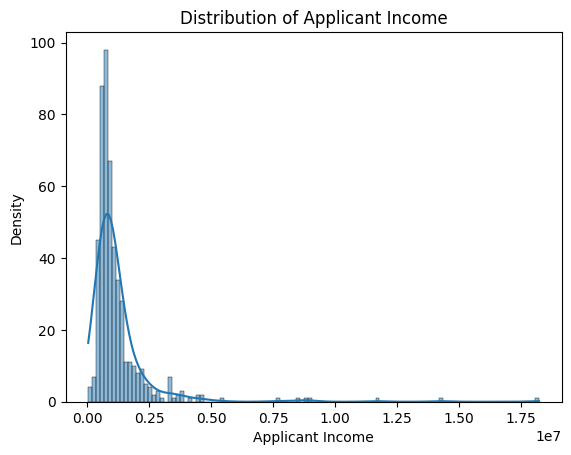

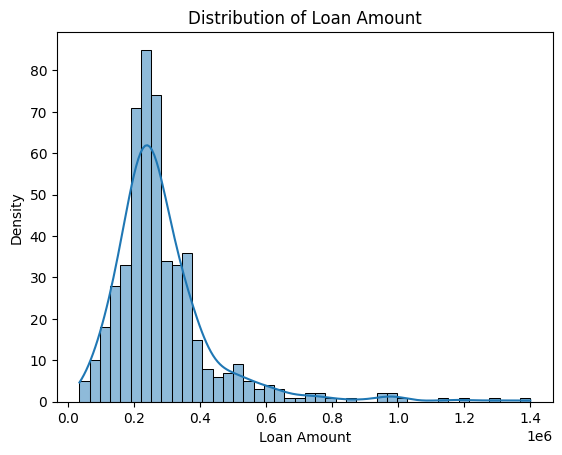

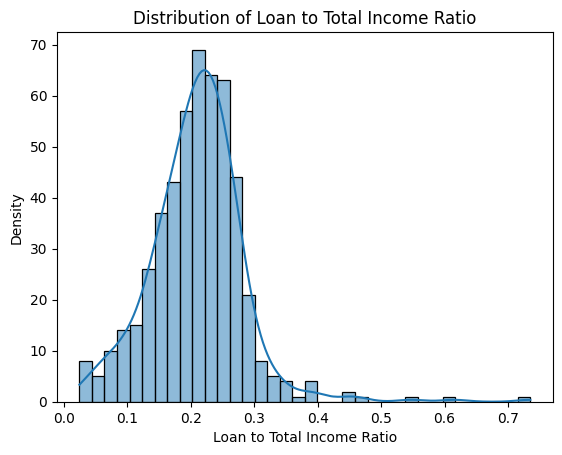

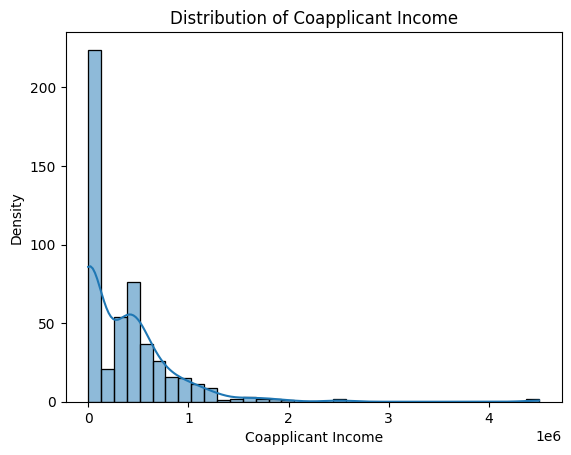

In [859]:
## Plot before applying any feature transformation

# Plot histograms of ApplicantIncome, LoanAmount, and Loan_to_TotalIncome
sns.histplot(df['ApplicantIncome'], kde=True)
plt.xlabel('Applicant Income')
plt.ylabel('Density')
plt.title('Distribution of Applicant Income')
plt.show()

sns.histplot(df['LoanAmount'], kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.title('Distribution of Loan Amount')
plt.show()

sns.histplot(df['Loan_to_Income'], kde=True)
plt.xlabel('Loan to Total Income Ratio')
plt.ylabel('Density')
plt.title('Distribution of Loan to Total Income Ratio')
plt.show()

sns.histplot(df['CoapplicantIncome'], kde=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Density')
plt.title('Distribution of Coapplicant Income')
plt.show()

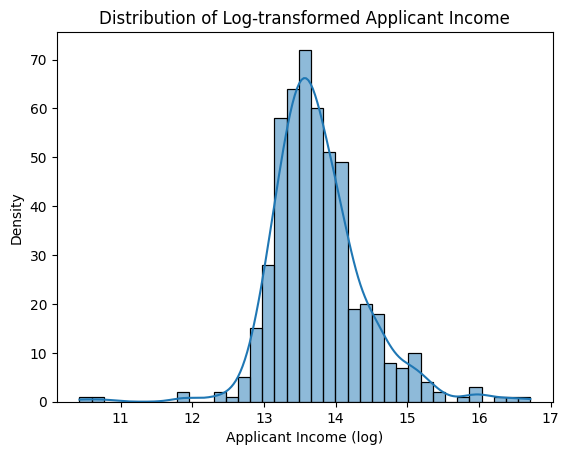

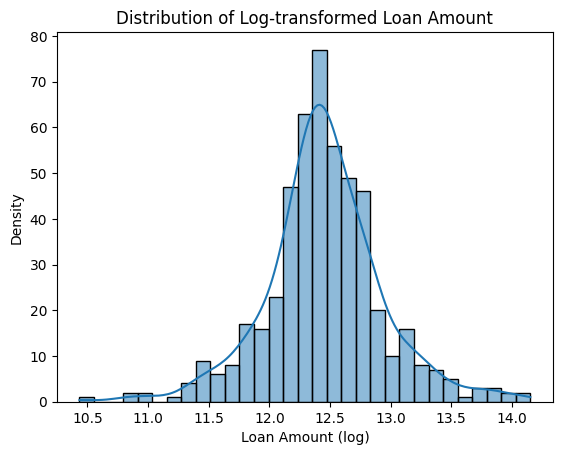

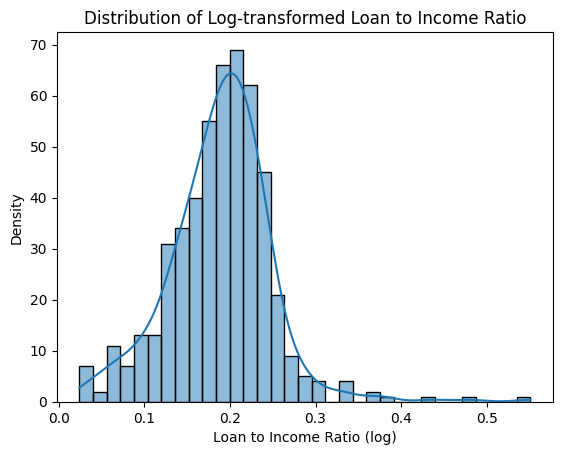

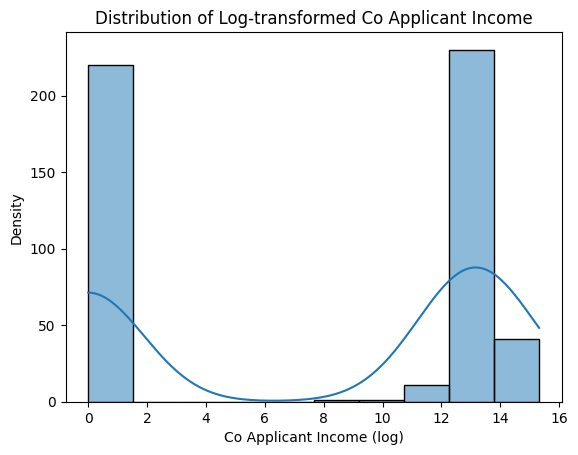

In [860]:
# Perform log transformation on specified columns
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])
df['Loan_to_Income_log'] = np.log1p(df['Loan_to_Income'])

#plot histograms
sns.histplot(df['ApplicantIncome_log'], kde=True)
plt.xlabel('Applicant Income (log)')
plt.ylabel('Density')
plt.title('Distribution of Log-transformed Applicant Income')
plt.show()

sns.histplot(df['LoanAmount_log'], kde=True)
plt.xlabel('Loan Amount (log)')
plt.ylabel('Density')
plt.title('Distribution of Log-transformed Loan Amount')
plt.show()

sns.histplot(df['Loan_to_Income_log'], kde=True)
plt.xlabel('Loan to Income Ratio (log)')
plt.ylabel('Density')
plt.title('Distribution of Log-transformed Loan to Income Ratio')
plt.show()

sns.histplot(df['CoapplicantIncome_log'], kde=True)
plt.xlabel('Co Applicant Income (log)')
plt.ylabel('Density')
plt.title('Distribution of Log-transformed Co Applicant Income')
plt.show()


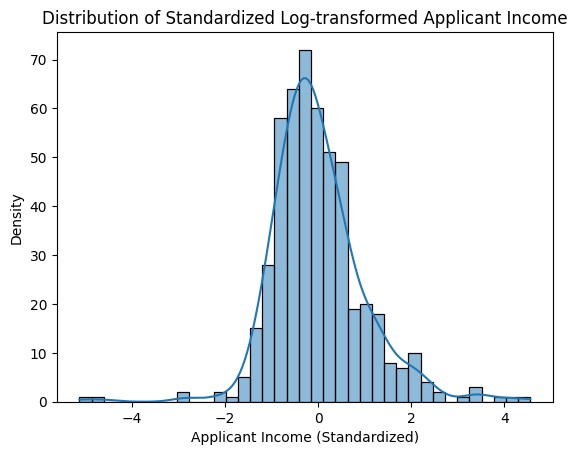

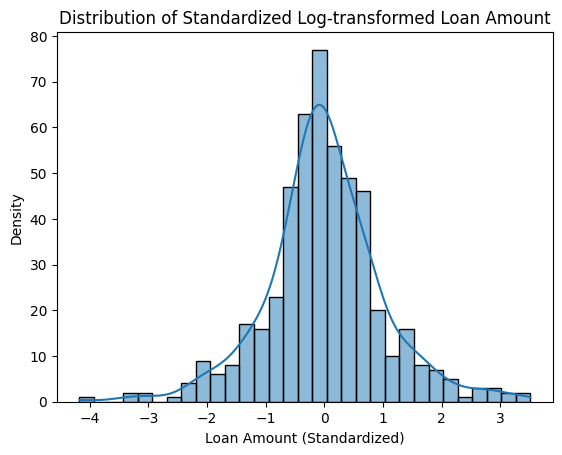

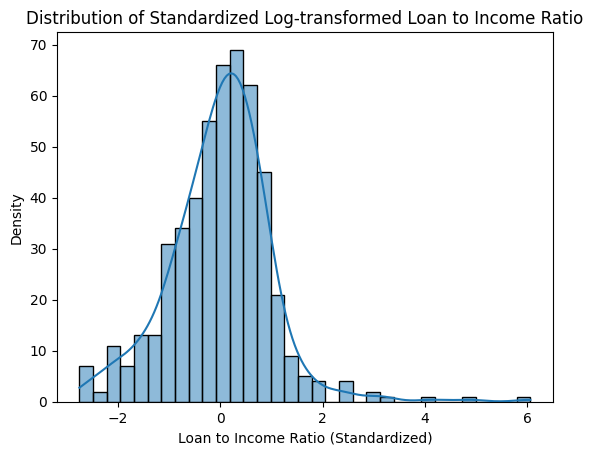

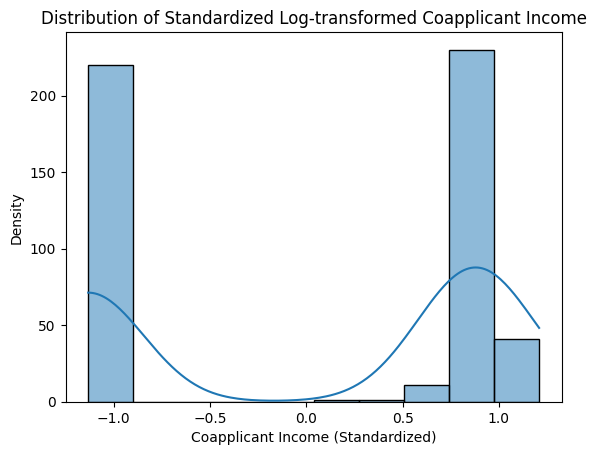

In [861]:
# Standardize the log-transformed features

from sklearn.preprocessing import StandardScaler

# Standardize the log-transformed features
scaler = StandardScaler()
df[['ApplicantIncome_log', 'LoanAmount_log', 'Loan_to_Income_log', 'CoapplicantIncome_log']] = scaler.fit_transform(df[['ApplicantIncome_log', 'LoanAmount_log', 'Loan_to_Income_log', 'CoapplicantIncome_log']])

# Plot histograms of standardized log-transformed features
sns.histplot(df['ApplicantIncome_log'], kde=True)
plt.xlabel('Applicant Income (Standardized)')
plt.ylabel('Density')
plt.title('Distribution of Standardized Log-transformed Applicant Income')
plt.show()

sns.histplot(df['LoanAmount_log'], kde=True)
plt.xlabel('Loan Amount (Standardized)')
plt.ylabel('Density')
plt.title('Distribution of Standardized Log-transformed Loan Amount')
plt.show()

sns.histplot(df['Loan_to_Income_log'], kde=True)
plt.xlabel('Loan to Income Ratio (Standardized)')
plt.ylabel('Density')
plt.title('Distribution of Standardized Log-transformed Loan to Income Ratio')
plt.show()

sns.histplot(df['CoapplicantIncome_log'], kde=True)
plt.xlabel('Coapplicant Income (Standardized)')
plt.ylabel('Density')
plt.title('Distribution of Standardized Log-transformed Coapplicant Income')
plt.show()


In [862]:
# Calculate skewness and kurtosis for each column in the DataFrame
skewness = df.skew()
kurtosis = df.kurtosis()

# Print the skewness and kurtosis for each column
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
Gender                  -1.631399
Married                 -0.616224
Dependents               1.059148
Education                1.396782
Self_Employed            2.220640
ApplicantIncome          6.530710
CoapplicantIncome        3.391829
LoanAmount               2.807366
Loan_Amount_Term        -2.369869
Credit_History          -2.094609
Property_Area           -0.080389
Loan_Status             -0.836602
Loan_to_Income           1.155542
ApplicantIncome_log      0.529124
CoapplicantIncome_log   -0.240468
LoanAmount_log           0.030834
Loan_to_Income_log       0.555657
dtype: float64

Kurtosis:
Gender                    0.664083
Married                  -1.626739
Dependents               -0.250058
Education                -0.049212
Self_Employed             2.942906
ApplicantIncome          57.488678
CoapplicantIncome        21.490927
LoanAmount               11.696374
Loan_Amount_Term          7.190436
Credit_History            2.396884
Property_Area            -1.371790
L

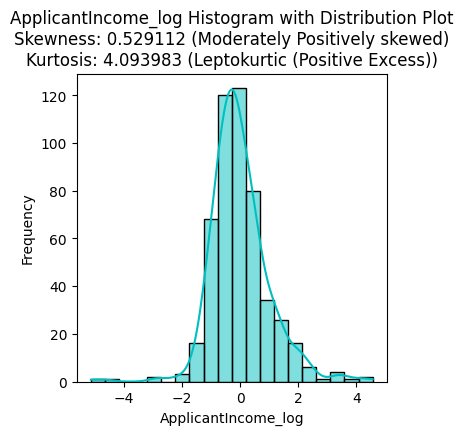

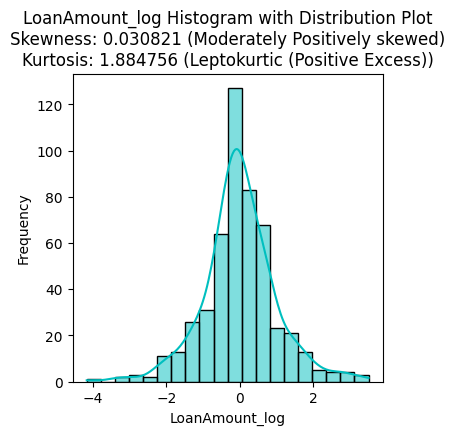

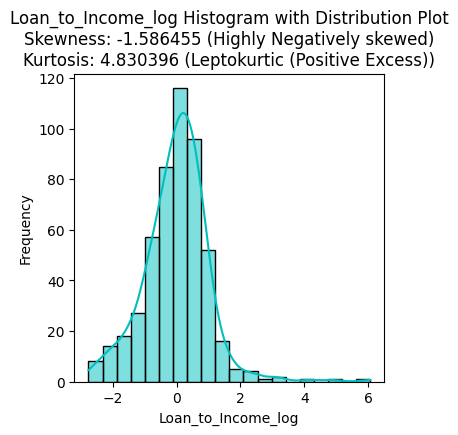

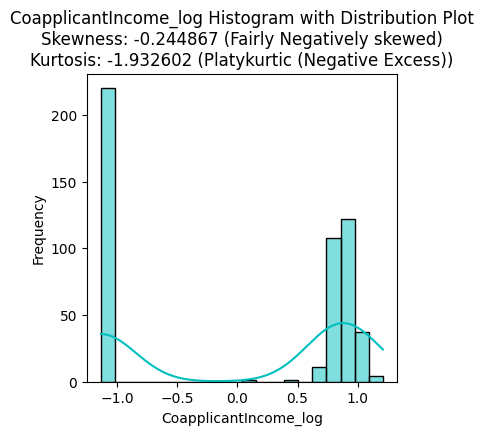

In [863]:
# Define skewness and kurtosis values
skewness_values = {
    'ApplicantIncome_log': 0.529112,
    'LoanAmount_log': 0.030821,
    'Loan_to_Income_log': -1.586455,
    'CoapplicantIncome_log': -0.244867
}

kurtosis_values = {
    'ApplicantIncome_log':       4.093983,
    'LoanAmount_log':            1.884756,
    'Loan_to_Income_log':        4.830396,
    'CoapplicantIncome_log':    -1.932602

}

# Function to categorize skewness
def categorize_skewness(skewness):
    if skewness <= -1:
        return 'Highly Negatively skewed'
    elif skewness > -1 and skewness <= -0.5:
        return 'Moderately Negatively skewed'
    elif skewness > -0.5 and skewness <= 0:
        return 'Fairly Negatively skewed'
    elif skewness > 0 and skewness <= -0.5:
        return 'Fairly Positively skewed'
    elif skewness > -0.5 and skewness < 1:
        return 'Moderately Positively skewed'
    elif skewness >= 1:
        return 'Highly Positively skewed'

# Function to categorize kurtosis
def categorize_kurtosis(kurtosis):
    if kurtosis < -1:
        return 'Platykurtic (Negative Excess)'
    elif kurtosis >= -1 and kurtosis <= 1:
        return 'Mesokurtic (Zero Excess)'
    elif kurtosis > 1:
        return 'Leptokurtic (Positive Excess)'

# Loop through the skewness and kurtosis values and plot histograms with distribution plots
for variable in skewness_values.keys():
    skewness = skewness_values[variable]
    kurtosis = kurtosis_values[variable]
    skewness_category = categorize_skewness(skewness)
    kurtosis_category = categorize_kurtosis(kurtosis)
    plt.figure(figsize=(4, 4))
    sns.histplot(df[variable].dropna(), bins=20, kde=True, color='c') # Drop NaN values before plotting
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'{variable} Histogram with Distribution Plot\nSkewness: {skewness} ({skewness_category})\nKurtosis: {kurtosis} ({kurtosis_category})')
    plt.show()


In [864]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_to_Income,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_to_Income_log
0,1,0,0,0,0,1316025,0.0,250000,360.0,1.0,2,1,0.189966,0.512321,-1.132971,-0.049786,-0.246694
1,1,1,1,0,0,1031175,339300.0,256000,360.0,1.0,0,0,0.186797,0.137036,0.813838,-0.000730,-0.291276
2,1,1,0,0,1,675000,0.0,132000,360.0,1.0,2,1,0.195556,-0.514923,-1.132971,-1.370800,-0.168359
3,1,1,0,1,0,581175,530550.0,240000,360.0,1.0,2,1,0.215881,-0.745188,0.882178,-0.134223,0.113433
4,1,0,0,0,0,1350000,0.0,282000,360.0,1.0,2,1,0.208889,0.551538,-1.132971,0.199348,0.017032


In [865]:
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_to_Income' ], axis=1, inplace=True)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_to_Income_log
0,1,0,0,0,0,360.0,1.0,2,1,0.512321,-1.132971,-0.049786,-0.246694
1,1,1,1,0,0,360.0,1.0,0,0,0.137036,0.813838,-0.000730,-0.291276
2,1,1,0,0,1,360.0,1.0,2,1,-0.514923,-1.132971,-1.370800,-0.168359
3,1,1,0,1,0,360.0,1.0,2,1,-0.745188,0.882178,-0.134223,0.113433
4,1,0,0,0,0,360.0,1.0,2,1,0.551538,-1.132971,0.199348,0.017032


# The dataset is now pre processed and ready to be fit into model

Steps:


*   Custom train test split to find train and test accuracies
*   Finding Evaluation Metrix
*   Cross validation
*   Hyper Parameter Tuning
*   Finding train and test accuracies with the best hyper paarameters
*   Finding evaluation metrices score post tuning
*   Finding top three models










In [866]:
# Model selection Libraries
from sklearn.model_selection import train_test_split , cross_val_score, KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [867]:
X = df.drop('Loan_Status', axis =1)
y = df['Loan_Status']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [868]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(403, 12)
(101, 12)
(403,)
(101,)


In [869]:
print(y_train.value_counts())
print('............................')
print(y_test.value_counts())

1    272
0    131
Name: Loan_Status, dtype: int64
............................
1    77
0    24
Name: Loan_Status, dtype: int64


In [870]:
# Define the models
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()

# Train and evaluate models
def clf_model_builder(clf_model, X_train, X_test, y_train, y_test):
    clf_model.fit(X_train , y_train)
    y_train_pred = clf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = clf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return("Model: {}\nTrain Accuracy: {}\nTest Accuracy: {}".format(type(clf_model).__name__, train_accuracy, test_accuracy))


clf_models = [rf, ab, gb, dt, svc, lr, knn]

for model in clf_models:
    print(clf_model_builder(model, X_train, X_test, y_train, y_test))
    print()


Model: RandomForestClassifier
Train Accuracy: 1.0
Test Accuracy: 0.8316831683168316

Model: AdaBoostClassifier
Train Accuracy: 0.8784119106699751
Test Accuracy: 0.7920792079207921

Model: GradientBoostingClassifier
Train Accuracy: 0.9404466501240695
Test Accuracy: 0.8514851485148515

Model: DecisionTreeClassifier
Train Accuracy: 1.0
Test Accuracy: 0.7128712871287128

Model: SVC
Train Accuracy: 0.674937965260546
Test Accuracy: 0.7623762376237624

Model: LogisticRegression
Train Accuracy: 0.7890818858560794
Test Accuracy: 0.8415841584158416

Model: KNeighborsClassifier
Train Accuracy: 0.7816377171215881
Test Accuracy: 0.7326732673267327



It can be  that some models like Random Forest and Decision Tree are having a high training accuracy, but a lower testing accuracy, which indicates that they may be overfitting to the training data. On the other hand, some models like Ada Boost, Gradient Boost and Logistic Regression  have a good balance of both training and testing accuracies and good test accuracies, which indicates that they are performing well on the new data as well. However SVM and KNN are having lower accuracies.

In [871]:
# Evaluation metrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def clf_model_builder(clf_model):
    
    clf_model.fit(X_train , y_train)
    y_pred = clf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    
    return {"Model": type(clf_model).__name__, "Accuracy": accuracy, "Precision": precision, 
            "Recall": recall, "F1 Score": f1}


clf_models = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), 
              DecisionTreeClassifier(), SVC(), LogisticRegression(), KNeighborsClassifier()]

for model in clf_models:
    print(clf_model_builder(model))
    print()

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8415841584158416, 'Precision': 0.8860759493670886, 'Recall': 0.9090909090909091, 'F1 Score': 0.8974358974358974}

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7920792079207921, 'Precision': 0.868421052631579, 'Recall': 0.8571428571428571, 'F1 Score': 0.8627450980392157}

{'Model': 'GradientBoostingClassifier', 'Accuracy': 0.8514851485148515, 'Precision': 0.8780487804878049, 'Recall': 0.935064935064935, 'F1 Score': 0.9056603773584906}

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7425742574257426, 'Precision': 0.8923076923076924, 'Recall': 0.7532467532467533, 'F1 Score': 0.8169014084507042}

{'Model': 'SVC', 'Accuracy': 0.7623762376237624, 'Precision': 0.7623762376237624, 'Recall': 1.0, 'F1 Score': 0.8651685393258427}

{'Model': 'LogisticRegression', 'Accuracy': 0.8415841584158416, 'Precision': 0.8505747126436781, 'Recall': 0.961038961038961, 'F1 Score': 0.9024390243902438}

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.732673267

Based on the provided accuracy, precision, recall, and F1 score, we can draw the following conclusions for each model:

RandomForestClassifier: This model has a high precision and recall, but its F1 score is lower than some other models.

AdaBoostClassifier: This model has a decent accuracy, precision, recall, and F1 score, but they are all lower than some other models. 

GradientBoostingClassifier: This model has the highest accuracy, precision, and F1 score among all models. The recall is also high.

DecisionTreeClassifier: This model has a low accuracy, but its precision, recall, and F1 score are relatively high.

SVC: This model has a low accuracy, precision, and F1 score, but its recall is perfect. 

LogisticRegression: This model has a high accuracy, precision, and F1 score, but its recall is lower than some other models. 

KNeighborsClassifier: This model has a low accuracy, but its precision, recall, and F1 score are relatively high. It may not be the best model for this dataset.

In [872]:
from sklearn.model_selection import cross_val_score

# Cross-validate each model
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
ab_cv_scores = cross_val_score(ab, X_train, y_train, cv=5)
gb_cv_scores = cross_val_score(gb, X_train, y_train, cv=5)
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
svc_cv_scores = cross_val_score(svc, X_train, y_train, cv=5)
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print the mean cross-validation score and standard deviation for each model
print('RandomForestClassifier CV scores:', rf_cv_scores)
print('RandomForestClassifier CV mean score:', rf_cv_scores.mean())
print('RandomForestClassifier CV std deviation:', rf_cv_scores.std())
print('\n')
print('AdaBoostClassifier CV scores:', ab_cv_scores)
print('AdaBoostClassifier CV mean score:', ab_cv_scores.mean())
print('AdaBoostClassifier CV std deviation:', ab_cv_scores.std())
print('\n')
print('GradientBoostingClassifier CV scores:', gb_cv_scores)
print('GradientBoostingClassifier CV mean score:', gb_cv_scores.mean())
print('GradientBoostingClassifier CV std deviation:', gb_cv_scores.std())
print('\n')
print('DecisionTreeClassifier CV scores:', dt_cv_scores)
print('DecisionTreeClassifier CV mean score:', dt_cv_scores.mean())
print('DecisionTreeClassifier CV std deviation:', dt_cv_scores.std())
print('\n')
print('SVC CV scores:', svc_cv_scores)
print('SVC CV mean score:', svc_cv_scores.mean())
print('SVC CV std deviation:', svc_cv_scores.std())
print('\n')
print('LogisticRegression CV scores:', lr_cv_scores)
print('LogisticRegression CV mean score:', lr_cv_scores.mean())
print('LogisticRegression CV std deviation:', lr_cv_scores.std())
print('\n')
print('KNeighborsClassifier CV scores:', knn_cv_scores)
print('KNeighborsClassifier CV mean score:', knn_cv_scores.mean())
print('KNeighborsClassifier CV std deviation:', knn_cv_scores.std())


RandomForestClassifier CV scores: [0.77777778 0.81481481 0.7654321  0.7        0.8125    ]
RandomForestClassifier CV mean score: 0.774104938271605
RandomForestClassifier CV std deviation: 0.041741405306163264


AdaBoostClassifier CV scores: [0.7037037  0.79012346 0.75308642 0.725      0.75      ]
AdaBoostClassifier CV mean score: 0.7443827160493828
AdaBoostClassifier CV std deviation: 0.029086063424005274


GradientBoostingClassifier CV scores: [0.7654321  0.79012346 0.77777778 0.725      0.8125    ]
GradientBoostingClassifier CV mean score: 0.7741666666666667
GradientBoostingClassifier CV std deviation: 0.02908868338882897


DecisionTreeClassifier CV scores: [0.71604938 0.66666667 0.67901235 0.6625     0.7375    ]
DecisionTreeClassifier CV mean score: 0.6923456790123457
DecisionTreeClassifier CV std deviation: 0.029423569741499365


SVC CV scores: [0.66666667 0.67901235 0.67901235 0.675      0.675     ]
SVC CV mean score: 0.6749382716049382
SVC CV std deviation: 0.004508286330002542



# **Here are the conclusions for each model based on their training and test accuracies and cross-validation scores:**

***RandomForestClassifier:***

The model has a high training accuracy, indicating overfitting. This is supported by the low cross-validation mean score, which is much lower than the training accuracy. The test accuracy is also lower than the training accuracy, which is another sign of overfitting. We can try to improve the model's performance by adjusting the hyperparameters or using feature selection methods to reduce overfitting.

***AdaBoostClassifier:***

The model has a decent training accuracy and test accuracy, but the cross-validation mean score is lower than the test accuracy, indicating some level of overfitting. We can try to adjust the hyperparameters or use feature selection methods to reduce overfitting and improve the model's performance.

***GradientBoostingClassifier:***

The model has a high training accuracy, but the test accuracy and cross-validation mean score are similar, indicating good generalization performance. We can try to further improve the model's performance by adjusting the hyperparameters or using feature selection methods.

***DecisionTreeClassifier:***

The model has a high training accuracy, but the test accuracy and cross-validation mean score are much lower, indicating overfitting. We can try to improve the model's performance by adjusting the hyperparameters or using feature selection methods to reduce overfitting.

***SVC:***

The model has a low training accuracy, but the test accuracy and cross-validation mean score are similar, indicating good generalization performance. However, the scores are still relatively low, so we can try to adjust the hyperparameters or use feature selection methods to improve the model's performance.

***LogisticRegression:***

The model has a decent training accuracy and test accuracy, and the cross-validation mean score is also similar, indicating good generalization performance. We can try to further improve the model's performance by adjusting the hyperparameters or using feature selection methods.

***KNeighborsClassifier:***

The model has a decent training accuracy, but the test accuracy and cross-validation mean score are lower, indicating overfitting. We can try to improve the model's performance by adjusting the hyperparameters or using feature selection methods to reduce overfitting.

In [787]:
# Hyperparameter Tuning
# Create a list of models to tune
models = [
    ('RandomForestClassifier', RandomForestClassifier(random_state = 42), {
        'n_estimators': [50, 200],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [3, 5],
        'max_features': ['log2', None]
    }),
    ('AdaBoostClassifier', AdaBoostClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1],
        'algorithm': ['SAMME', 'SAMME.R']
    }),
    ('GradientBoostingClassifier', GradientBoostingClassifier(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 4, 5],
        'max_features': ['log2', None]
    }),
    ('DecisionTreeClassifier', DecisionTreeClassifier(), {
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 3],
        'criterion': ['gini', 'entropy'],
        'max_features': ['log2', None]
    }),
    ('LogisticRegression', LogisticRegression(), {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }),
    ('SVC', SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }),
    ('KNeighborsClassifier', KNeighborsClassifier(), {
        'n_neighbors': [3, 5],
        'weights': ['uniform', 'distance'],
        'leaf_size': [10, 20]
    })
]
# Loop over models, perform grid search, and print the best parameters and score
for name, model, params in models:
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print('Best parameters for {}:'.format(name))
    print(grid_search.best_params_)
    print('Best score for {}:'.format(name))
    print(grid_search.best_score_)
    print('')


Best parameters for RandomForestClassifier:
{'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForestClassifier:
0.8088888888888889

Best parameters for AdaBoostClassifier:
{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
Best score for AdaBoostClassifier:
0.8013888888888889

Best parameters for GradientBoostingClassifier:
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best score for GradientBoostingClassifier:
0.803858024691358

Best parameters for DecisionTreeClassifier:
{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best score for DecisionTreeClassifier:
0.7989197530864198

Best parameters for LogisticRegression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for LogisticRegression:
0.7964197530864198

Best parameters for SVC:
{'C': 

In [788]:
# Finding the train and test accuracies by using the best hyperparameters and best score 
# define the classifiers with their respective best parameters
rf_clf = RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200,  random_state=42)
ada_clf = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=50)
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=2)
lr_clf = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
svc_clf = SVC(C=10, gamma='auto', kernel='rbf')
knn_clf = KNeighborsClassifier(leaf_size=10, n_neighbors=5, weights='uniform')

# fit the classifiers on the training data
rf_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

# predict the labels for the training and testing data
rf_train_preds = rf_clf.predict(X_train)
rf_test_preds = rf_clf.predict(X_test)
ada_train_preds = ada_clf.predict(X_train)
ada_test_preds = ada_clf.predict(X_test)
gb_train_preds = gb_clf.predict(X_train)
gb_test_preds = gb_clf.predict(X_test)
dt_train_preds = dt_clf.predict(X_train)
dt_test_preds = dt_clf.predict(X_test)
lr_train_preds = lr_clf.predict(X_train)
lr_test_preds = lr_clf.predict(X_test)
svc_train_preds = svc_clf.predict(X_train)
svc_test_preds = svc_clf.predict(X_test)
knn_train_preds = knn_clf.predict(X_train)
knn_test_preds = knn_clf.predict(X_test)

# calculate the accuracy of the classifiers on the training and testing data
rf_train_acc = accuracy_score(y_train, rf_train_preds)
rf_test_acc = accuracy_score(y_test, rf_test_preds)
ada_train_acc = accuracy_score(y_train, ada_train_preds)
ada_test_acc = accuracy_score(y_test, ada_test_preds)
gb_train_acc = accuracy_score(y_train, gb_train_preds)
gb_test_acc = accuracy_score(y_test, gb_test_preds)
dt_train_acc = accuracy_score(y_train, dt_train_preds)
dt_test_acc = accuracy_score(y_test, dt_test_preds)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_test_preds)
svc_train_acc = accuracy_score(y_train, svc_train_preds)
svc_test_acc = accuracy_score(y_test, svc_test_preds)
knn_train_acc = accuracy_score(y_train, knn_train_preds)
knn_test_acc = accuracy_score(y_test, knn_test_preds)

# print the accuracy of the classifiers on the training and testing data
print("Random Forest Classifier:")
print("Training Accuracy:", rf_train_acc)
print("Testing Accuracy:", rf_test_acc)
print("\n")

print("AdaBoost Classifier:")
print("Training Accuracy:", ada_train_acc)
print("Testing Accuracy:", ada_test_acc)
print("\n")

print("Gradient Boosting Classifier:")
print("Training Accuracy:", gb_train_acc)
print("Testing Accuracy:", gb_test_acc)
print("\n")

print("Decision Tree Classifier:")
print("Training Accuracy:", dt_train_acc)
print("Testing Accuracy:", dt_test_acc)
print("\n")

print("Logistic Regression:")
print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)
print("\n")

print("Support Vector Classifier:")
print("Training Accuracy:", svc_train_acc)
print("Testing Accuracy:", svc_test_acc)
print("\n")

print("K-Nearest Neighbors Classifier:")
print("Training Accuracy:", knn_train_acc)
print("Testing Accuracy:", knn_test_acc)
print("\n")


Random Forest Classifier:
Training Accuracy: 0.8337468982630273
Testing Accuracy: 0.8712871287128713


AdaBoost Classifier:
Training Accuracy: 0.8114143920595533
Testing Accuracy: 0.8514851485148515


Gradient Boosting Classifier:
Training Accuracy: 0.8213399503722084
Testing Accuracy: 0.8613861386138614


Decision Tree Classifier:
Training Accuracy: 0.8163771712158809
Testing Accuracy: 0.8712871287128713


Logistic Regression:
Training Accuracy: 0.7965260545905707
Testing Accuracy: 0.8514851485148515


Support Vector Classifier:
Training Accuracy: 0.8883374689826302
Testing Accuracy: 0.7722772277227723


K-Nearest Neighbors Classifier:
Training Accuracy: 0.7816377171215881
Testing Accuracy: 0.7326732673267327




In [789]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classifiers = [rf_clf, ada_clf, gb_clf, dt_clf, lr_clf, svc_clf, knn_clf]
classifier_names = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN']

for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)


    print(name + ':')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('----------------------------------')


Random Forest:
Accuracy: 0.8712871287128713
Precision: 0.8809523809523809
Recall: 0.961038961038961
F1 Score: 0.9192546583850931
----------------------------------
AdaBoost:
Accuracy: 0.8514851485148515
Precision: 0.8522727272727273
Recall: 0.974025974025974
F1 Score: 0.9090909090909091
----------------------------------
Gradient Boosting:
Accuracy: 0.8613861386138614
Precision: 0.8620689655172413
Recall: 0.974025974025974
F1 Score: 0.9146341463414633
----------------------------------
Decision Tree:
Accuracy: 0.8712871287128713
Precision: 0.872093023255814
Recall: 0.974025974025974
F1 Score: 0.9202453987730062
----------------------------------
Logistic Regression:
Accuracy: 0.8514851485148515
Precision: 0.8522727272727273
Recall: 0.974025974025974
F1 Score: 0.9090909090909091
----------------------------------
SVM:
Accuracy: 0.7722772277227723
Precision: 0.8375
Recall: 0.8701298701298701
F1 Score: 0.8535031847133757
----------------------------------
KNN:
Accuracy: 0.7326732673267327

Based on the given data, the Random Forest Classifier and Decision Tree Classifier have the highest testing accuracy of 0.8712871287128713, followed by Gradient Boosting Classifier with  accuracy of 0.8613861386138614.

Precision is an important evaluation metric for this dataset as higher precision indicates lower the number of false positives, thereby decreasing the chances of loan approval for those who are unlikely to pay back the loan. This is especially important in the context of a bank loan model as approving a loan to someone who is unlikely to pay it back can result in financial losses for the bank. Therefore, optimizing for precision can help the bank to minimize the risk of defaults and bad loans.

The Random Forest Classifier has the highest precision followed by Decision Tree Classifier abd Gradient Boost Clasifier.

The AdaBoost Classifier and Logistic Regression have testing accuracy of 0.851

The Support Vector Classifier has a high training accuracy of 0.888, but a lower testing accuracy of 0.772. The K-Nearest Neighbors Classifier has the lowest testing accuracy of 0.732, and also has the lowest precision and F1 scores among all models,  suggesting that they may not be as effective at generalizing to new data.

In conclusion, the Random Forest Classifier, Decision Tree Classifier, and Gradient Boosting Classifier performed the best among all models, achieving high accuracy, precision, recall, and F1 scores. The other models also performed reasonably well, but did not outperform these top three models.
This suggests that these models have good generalization performance and can accurately predict the target variable on new data.

## **Using test data to predict on top three models**

In [791]:
# Load the test data into a Pandas dataframe
df_test = pd.read_excel('consumer creditworthiness test data.xlsx')
df_test.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural


In [792]:
df_test.isnull().sum()

Loan_ID              0
Gender               3
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       7
Property_Area        0
dtype: int64

In [793]:
df_test = df_test.drop(['Loan_ID'], axis = 1)

In [794]:
df_test[df_test['LoanAmount']== 0]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban
29,Male,Yes,2,Graduate,Yes,1492425,0,0,360,0.0,Rural
30,Male,Yes,1,Not Graduate,No,560700,534375,0,360,1.0,Rural
84,Male,Yes,0,Not Graduate,No,540000,855000,0,180,1.0,Urban


In [795]:
df_test = df_test[df_test['LoanAmount'] != 0]

# Reset the index after dropping rows
df_test.reset_index(drop=True, inplace=True)

#Checking for missing values again
print(df_test.isnull().sum())

Gender               3
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       7
Property_Area        0
dtype: int64


In [796]:
# Impute null values with mode (most frequent value)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)

# Check the updated DataFrame
print(df_test.isnull().sum())  # Print the count of null values for each feature

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [797]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             89 non-null     object 
 1   Married            89 non-null     object 
 2   Dependents         89 non-null     object 
 3   Education          89 non-null     object 
 4   Self_Employed      89 non-null     object 
 5   ApplicantIncome    89 non-null     int64  
 6   CoapplicantIncome  89 non-null     int64  
 7   LoanAmount         89 non-null     int64  
 8   Loan_Amount_Term   89 non-null     int64  
 9   Credit_History     89 non-null     float64
 10  Property_Area      89 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 7.8+ KB


In [798]:
# Loan-to-Total Income ratio
df_test['Loan_to_Income'] = (df_test['LoanAmount'] / (df_test['ApplicantIncome'] + df_test['CoapplicantIncome']))

In [799]:
# Encode the categorical features
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test['Married'] = label_encoder.fit_transform(df_test['Married'])
df_test['Education'] = label_encoder.fit_transform(df_test['Education'])
df_test['Self_Employed'] = label_encoder.fit_transform(df_test['Self_Employed'])
df_test['Property_Area'] = label_encoder.fit_transform(df_test['Property_Area'])

# Print the unique values of the encoded features
print(df_test['Gender'].unique())
print(df_test['Married'].unique())
print(df_test['Education'].unique())
print(df_test['Self_Employed'].unique())
print(df_test['Property_Area'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[1 0 2]


In [800]:
df_test['Dependents'] = df_test['Dependents'].replace('3+', 3)
df_test['Dependents']= pd.to_numeric(df_test['Dependents'])
df_test['Dependents'].unique()

array([0, 3, 2, 1])

In [801]:
df_test['ApplicantIncome_log'] = np.log1p(df_test['ApplicantIncome'])
df_test['CoapplicantIncome_log'] = np.log1p(df_test['CoapplicantIncome'])
df_test['LoanAmount_log'] = np.log1p(df_test['LoanAmount'])
df_test['Loan_to_Income_log'] = np.log1p(df_test['Loan_to_Income'])

In [802]:
df_test[['ApplicantIncome_log', 'LoanAmount_log', 'Loan_to_Income_log', 'CoapplicantIncome_log']] = scaler.fit_transform(df_test[['ApplicantIncome_log', 'LoanAmount_log', 'Loan_to_Income_log', 'CoapplicantIncome_log']])


In [803]:
df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_to_Income' ], axis=1, inplace=True)
df_test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_to_Income_log
0,1,0,0,0,0,360,1.0,1,-0.840888,-1.052479,-1.444402,-0.288205
1,1,1,3,0,1,360,1.0,0,0.493487,0.879250,-0.461399,-1.307559
2,1,1,2,0,1,360,1.0,0,1.040977,1.125472,2.117834,0.888645
3,1,1,2,0,1,360,1.0,0,2.325158,-1.052479,1.818047,-0.181471
4,1,1,0,0,0,360,1.0,1,-0.170376,-1.052479,-0.304683,0.580742


In [804]:
## Predict on Random Forest Classifier
X_test = df_test
rf_test_pred = rf_clf.predict(X_test)
rf_test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0])

In [805]:
## Predict on Decision Tree Classifier
dt_test_pred = dt_clf.predict(X_test)
dt_test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0])

In [806]:
## Predict on Gradient Boost  Classifier
gb_test_pred = gb_clf.predict(X_test)
gb_test_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0])

In [807]:
## Adding three new columns to the df_test dataframe, one for each prediction made by the Random Forest Classifier, Decision Tree Classifier, and Gradient Boosting Classifier.

df_test['RF_Prediction'] = rf_test_pred
df_test['DT_Prediction'] = dt_test_pred
df_test['GB_Prediction'] = gb_test_pred

In [808]:
df_test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_to_Income_log,RF_Prediction,DT_Prediction,GB_Prediction
0,1,0,0,0,0,360,1.0,1,-0.840888,-1.052479,-1.444402,-0.288205,1,1,1
1,1,1,3,0,1,360,1.0,0,0.493487,0.879250,-0.461399,-1.307559,1,1,1
2,1,1,2,0,1,360,1.0,0,1.040977,1.125472,2.117834,0.888645,1,1,1
3,1,1,2,0,1,360,1.0,0,2.325158,-1.052479,1.818047,-0.181471,1,1,1
4,1,1,0,0,0,360,1.0,1,-0.170376,-1.052479,-0.304683,0.580742,1,1,1
